<a href="https://colab.research.google.com/github/Mata-68/desafio_alura_store/blob/main/DesafioAluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importaci√≥n de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



In [ ]:
from urllib.request import urlopen
import csv

urls = [url, url2, url3, url4]

# Funci√≥n para leer un CSV desde URL
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

# An√°lisis de facturaci√≥n
total_facturacion = 0

for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    facturacion_tienda = 0

    for venta in datos_tienda:
        precio = float(venta['Precio'])  # Solo sumamos el precio
        facturacion_tienda += precio

    print(f"Facturaci√≥n Tienda {i+1}: ${facturacion_tienda:.2f}")
    total_facturacion += facturacion_tienda

# Mostrar facturaci√≥n total
print(f"\nFacturaci√≥n total de todas las tiendas: ${total_facturacion:.2f}")


Facturaci√≥n Tienda 1: $1150880400.00
Facturaci√≥n Tienda 2: $1116343500.00
Facturaci√≥n Tienda 3: $1098019600.00
Facturaci√≥n Tienda 4: $1038375700.00

Facturaci√≥n total de todas las tiendas: $4403619200.00


In [ ]:
# Sumando solo el precio de las ventas, sin considerar las cuotas
facturacion_tienda1 = tienda['Precio'].astype(float).sum()
facturacion_tienda2 = tienda2['Precio'].astype(float).sum()
facturacion_tienda3 = tienda3['Precio'].astype(float).sum()
facturacion_tienda4 = tienda4['Precio'].astype(float).sum()

# Mostrar los resultados
print(f"Facturaci√≥n Tienda 1: ${facturacion_tienda1:.2f}")
print(f"Facturaci√≥n Tienda 2: ${facturacion_tienda2:.2f}")
print(f"Facturaci√≥n Tienda 3: ${facturacion_tienda3:.2f}")
print(f"Facturaci√≥n Tienda 4: ${facturacion_tienda4:.2f}")

# Facturaci√≥n total de todas las tiendas
facturacion_total = facturacion_tienda1 + facturacion_tienda2 + facturacion_tienda3 + facturacion_tienda4
print(f"\nFacturaci√≥n total de todas las tiendas: ${facturacion_total:.2f}")


Facturaci√≥n Tienda 1: $1150880400.00
Facturaci√≥n Tienda 2: $1116343500.00
Facturaci√≥n Tienda 3: $1098019600.00
Facturaci√≥n Tienda 4: $1038375700.00

Facturaci√≥n total de todas las tiendas: $4403619200.00


# 2. Ventas por categor√≠a

In [ ]:


def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        # Decodificar los datos
        lineas = respuesta.read().decode('utf-8').splitlines()
        reader = csv.DictReader(lineas)
        for fila in reader:
            datos.append(fila)
    return datos

# Diccionario para almacenar las ventas por categor√≠a
ventas_por_categoria = {}

# Procesar todas las tiendas
for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    print(f"\nVentas por categor√≠a en Tienda {i+1}:")

    # Diccionario para la tienda actual
    categorias_tienda = {}

    for venta in datos_tienda:
        categoria = venta['Categor√≠a del Producto']
        precio = float(venta['Precio'])
        cantidad = int(venta['Cantidad de cuotas'])
        monto_venta = precio * cantidad

        # Agregar al diccionario de la tienda actual
        if categoria in categorias_tienda:
            categorias_tienda[categoria] += monto_venta
        else:
            categorias_tienda[categoria] = monto_venta

        # Agregar al diccionario general
        if categoria in ventas_por_categoria:
            ventas_por_categoria[categoria] += monto_venta
        else:
            ventas_por_categoria[categoria] = monto_venta

    # Mostrar resultados para esta tienda
    for categoria, monto in categorias_tienda.items():
        print(f"  {categoria}: ${monto:.2f}")

# Mostrar resultados totales
print("\nVentas totales por categor√≠a (todas las tiendas):")
for categoria, monto in ventas_por_categoria.items():
    print(f"  {categoria}: ${monto:.2f}")

# Calcular el total general
total_general = sum(ventas_por_categoria.values())
print(f"\nTotal general de ventas: ${total_general:.2f}")


Ventas por categor√≠a en Tienda 1:
  Electr√≥nicos: $1290390700.00
  Muebles: $582928200.00
  Juguetes: $49062800.00
  Electrodom√©sticos: $1032375600.00
  Art√≠culos para el hogar: $38316800.00
  Deportes y diversi√≥n: $126883700.00
  Libros: $25769400.00
  Instrumentos musicales: $276990500.00

Ventas por categor√≠a en Tienda 2:
  Muebles: $527332100.00
  Instrumentos musicales: $294448700.00
  Deportes y diversi√≥n: $81660600.00
  Electr√≥nicos: $1286643600.00
  Art√≠culos para el hogar: $42739700.00
  Juguetes: $46721200.00
  Electrodom√©sticos: $1026226300.00
  Libros: $31417000.00

Ventas por categor√≠a en Tienda 3:
  Electrodom√©sticos: $1081380800.00
  Muebles: $555092500.00
  Instrumentos musicales: $250336000.00
  Deportes y diversi√≥n: $123399200.00
  Electr√≥nicos: $1101334500.00
  Juguetes: $61190400.00
  Art√≠culos para el hogar: $44724600.00
  Libros: $26358900.00

Ventas por categor√≠a en Tienda 4:
  Electrodom√©sticos: $879089600.00
  Muebles: $556628000.00
  Deportes

In [ ]:
# Funci√≥n para calcular y mostrar las ventas por categor√≠a de una tienda
def ventas_por_categoria(tienda, numero):
    ventas = tienda.groupby('Categor√≠a del Producto')['Precio'].sum()
    print(f"\nVentas por categor√≠a en Tienda {numero}:")
    print(ventas)

# Mostrar resultados para cada tienda
ventas_por_categoria(tienda, 1)
ventas_por_categoria(tienda2, 2)
ventas_por_categoria(tienda3, 3)
ventas_por_categoria(tienda4, 4)


Ventas por categor√≠a en Tienda 1:
Categor√≠a del Producto
Art√≠culos para el hogar     12698400.0
Deportes y diversi√≥n        39290000.0
Electrodom√©sticos          363685200.0
Electr√≥nicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64

Ventas por categor√≠a en Tienda 2:
Categor√≠a del Producto
Art√≠culos para el hogar     14746900.0
Deportes y diversi√≥n        34744500.0
Electrodom√©sticos          348567800.0
Electr√≥nicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes                    15945400.0
Libros                      10091200.0
Muebles                    176426300.0
Name: Precio, dtype: float64

Ventas por categor√≠a en Tienda 3:
Categor√≠a del Producto
Art√≠culos para el hogar     15060000.0
Deportes y diversi√≥n        35593100.0
Electrodom√©sticos          329237900.0
Electr√≥ni

# 3. Calificaci√≥n promedio de la tienda


In [ ]:


def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        # Decodificar los datos
        lineas = respuesta.read().decode('utf-8').splitlines()
        reader = csv.DictReader(lineas)
        for fila in reader:
            datos.append(fila)
    return datos

# Calcular la calificaci√≥n promedio para cada tienda
for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)

    # Variables para calcular el promedio
    suma_calificaciones = 0
    cantidad_productos = 0

    for producto in datos_tienda:
        try:
            # Intentamos con diferentes posibles nombres de columna
            if 'Calificaci√≥n' in producto:
                calificacion = float(producto['Calificaci√≥n'])
            elif 'Calificacion' in producto:
                calificacion = float(producto['Calificacion'])
            elif 'calificaci√≥n' in producto:
                calificacion = float(producto['calificaci√≥n'])
            elif 'calificacion' in producto:
                calificacion = float(producto['calificacion'])
            else:
                # Si no encontramos la columna, imprimimos las claves disponibles
                print(f"Claves disponibles en la tienda {i+1}:", producto.keys())
                raise KeyError("No se encontr√≥ la columna de calificaci√≥n")

            suma_calificaciones += calificacion
            cantidad_productos += 1
        except (ValueError, KeyError) as e:
            if isinstance(e, KeyError):
                raise
            # Ignoramos valores que no se pueden convertir a float
            continue

    if cantidad_productos > 0:
        calificacion_promedio = suma_calificaciones / cantidad_productos
        print(f"Calificaci√≥n promedio de la Tienda {i+1}: {calificacion_promedio:.2f}")
    else:
        print(f"No se pudieron procesar calificaciones para la Tienda {i+1}")

Calificaci√≥n promedio de la Tienda 1: 3.98
Calificaci√≥n promedio de la Tienda 2: 4.04
Calificaci√≥n promedio de la Tienda 3: 4.05
Calificaci√≥n promedio de la Tienda 4: 4.00


In [ ]:
def clasificacion_promedio(tienda, numero):
    promedio = tienda['Calificaci√≥n'].mean()
    print(f"Clasificaci√≥n promedio en Tienda {numero}: {promedio:.2f}")

# Mostrar resultados para cada tienda
clasificacion_promedio(tienda, 1)
clasificacion_promedio(tienda2, 2)
clasificacion_promedio(tienda3, 3)
clasificacion_promedio(tienda4, 4)

Clasificaci√≥n promedio en Tienda 1: 3.98
Clasificaci√≥n promedio en Tienda 2: 4.04
Clasificaci√≥n promedio en Tienda 3: 4.05
Clasificaci√≥n promedio en Tienda 4: 4.00


# 4. Productos m√°s y menos vendidos

In [ ]:
from collections import defaultdict

def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

# Funci√≥n para calcular Top 3 m√°s y menos dinero generado
def top_productos(datos_tienda, tienda_numero):
    ingreso_por_producto = defaultdict(float)

    for venta in datos_tienda:
        producto = venta['Producto']
        precio = float(venta['Precio'])
        # Ahora solo usamos el precio (no multiplicamos por cantidad de cuotas)
        ingreso_por_producto[producto] += precio

    # Convertimos a lista ordenada
    productos_ordenados = sorted(ingreso_por_producto.items(), key=lambda x: x[1], reverse=True)

    top_mas_vendidos = productos_ordenados[:3]
    top_menos_vendidos = productos_ordenados[-3:]

    print(f"\nTienda {tienda_numero} - TOP 3 productos que M√ÅS dinero generaron:")
    for producto, ingreso in top_mas_vendidos:
        print(f"  {producto} - Ingresos: ${ingreso:.2f}")

    print(f"\nTienda {tienda_numero} - TOP 3 productos que MENOS dinero generaron:")
    for producto, ingreso in top_menos_vendidos:
        print(f"  {producto} - Ingresos: ${ingreso:.2f}")

# Recorrer todas las tiendas
for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    top_productos(datos_tienda, i)


Tienda 1 - TOP 3 productos que M√ÅS dinero generaron:
  TV LED UHD 4K - Ingresos: $142150200.00
  Refrigerador - Ingresos: $112143300.00
  Iphone 15 - Ingresos: $97902200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Cubo m√°gico 8x8 - Ingresos: $696900.00
  Dinosaurio Rex - Ingresos: $688900.00
  Cuerda para saltar - Ingresos: $652800.00

Tienda 2 - TOP 3 productos que M√ÅS dinero generaron:
  Iphone 15 - Ingresos: $113225800.00
  TV LED UHD 4K - Ingresos: $103375000.00
  Refrigerador - Ingresos: $97632500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $856900.00
  Dinosaurio Rex - Ingresos: $770300.00
  Cubo m√°gico 8x8 - Ingresos: $643600.00

Tienda 3 - TOP 3 productos que M√ÅS dinero generaron:
  Refrigerador - Ingresos: $99889700.00
  TV LED UHD 4K - Ingresos: $96669100.00
  Iphone 15 - Ingresos: $93225700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $853800.00
  Dinosaurio 

In [ ]:
# Leer todos los CSVs y agregar una columna 'Tienda'
df_total = pd.concat(
    [pd.read_csv(url).assign(Tienda=f"Tienda {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

# Aseguramos los tipos correctos
df_total['Precio'] = df_total['Precio'].astype(float)
df_total['Cantidad de cuotas'] = df_total['Cantidad de cuotas'].astype(int)

# El ingreso es simplemente el Precio (no multiplicamos por cantidad de cuotas)
df_total['Ingreso'] = df_total['Precio']

# Agrupamos por Tienda y Producto sumando el ingreso
ventas = df_total.groupby(['Tienda', 'Producto'])['Ingreso'].sum().reset_index()

# Funci√≥n para mostrar los 3 productos que m√°s y menos dinero generaron
def top_productos(tienda):
    data = ventas[ventas['Tienda'] == tienda]

    top_mas_vendidos = data.sort_values(by='Ingreso', ascending=False).head(3)
    top_menos_vendidos = data.sort_values(by='Ingreso', ascending=True).head(3)

    print(f"\n{tienda} - TOP 3 productos que M√ÅS dinero generaron:")
    for _, fila in top_mas_vendidos.iterrows():
        print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

    print(f"\n{tienda} - TOP 3 productos que MENOS dinero generaron:")
    for _, fila in top_menos_vendidos.iterrows():
        print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

# Lista √∫nica de tiendas
tiendas_unicas = ventas['Tienda'].unique()

# Mostrar resultados para cada tienda
for tienda in tiendas_unicas:
    top_productos(tienda)


Tienda 1 - TOP 3 productos que M√ÅS dinero generaron:
  TV LED UHD 4K - Ingresos: $142150200.00
  Refrigerador - Ingresos: $112143300.00
  Iphone 15 - Ingresos: $97902200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $652800.00
  Dinosaurio Rex - Ingresos: $688900.00
  Cubo m√°gico 8x8 - Ingresos: $696900.00

Tienda 2 - TOP 3 productos que M√ÅS dinero generaron:
  Iphone 15 - Ingresos: $113225800.00
  TV LED UHD 4K - Ingresos: $103375000.00
  Refrigerador - Ingresos: $97632500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cubo m√°gico 8x8 - Ingresos: $643600.00
  Dinosaurio Rex - Ingresos: $770300.00
  Cuerda para saltar - Ingresos: $856900.00

Tienda 3 - TOP 3 productos que M√ÅS dinero generaron:
  Refrigerador - Ingresos: $99889700.00
  TV LED UHD 4K - Ingresos: $96669100.00
  Iphone 15 - Ingresos: $93225700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cubo m√°gico 8x8 - Ingresos: $640400.00
  Dinosaurio Re

# 5. Env√≠o promedio por tienda

In [ ]:
def calcular_envio_promedio(datos_tienda, tienda_numero):
    costos_envio = []

    for venta in datos_tienda:
        costo_envio = float(venta['Costo de env√≠o'])
        costos_envio.append(costo_envio)

    promedio_envio = sum(costos_envio) / len(costos_envio) if costos_envio else 0

    print(f"Tienda {tienda_numero} - Env√≠o promedio: ${promedio_envio:.2f}")

# Procesar todas las tiendas
for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    calcular_envio_promedio(datos_tienda, i)

Tienda 1 - Env√≠o promedio: $26018.61
Tienda 2 - Env√≠o promedio: $25216.24
Tienda 3 - Env√≠o promedio: $24805.68
Tienda 4 - Env√≠o promedio: $23459.46


In [ ]:
# Asegurar que el costo de env√≠o es num√©rico
df_total['Costo de env√≠o'] = df_total['Costo de env√≠o'].astype(float)

# Agrupar por tienda y calcular el promedio del costo de env√≠o
envio_promedio = df_total.groupby('Tienda')['Costo de env√≠o'].mean()

# Mostrar resultados
print("\nEnv√≠o promedio por tienda:")
for tienda, promedio in envio_promedio.items():
    print(f"{tienda}: ${promedio:.2f}")


Env√≠o promedio por tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


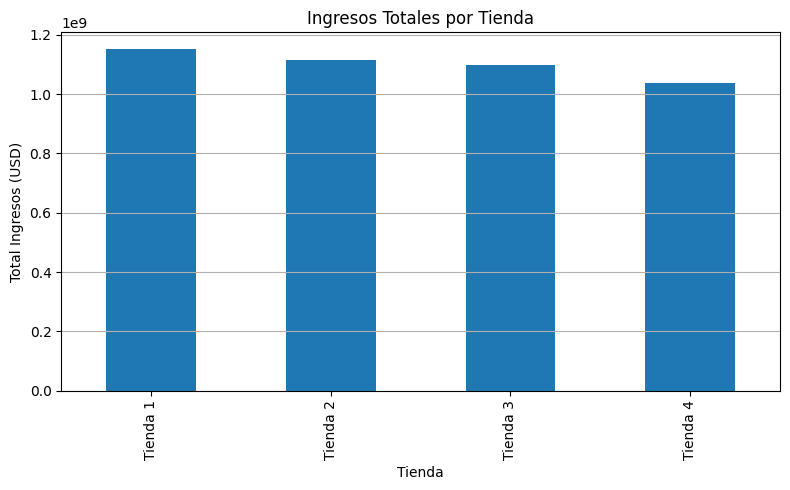

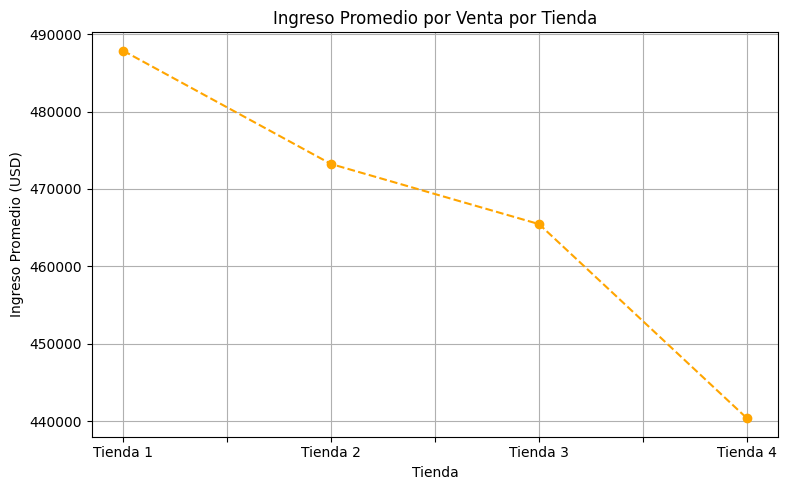

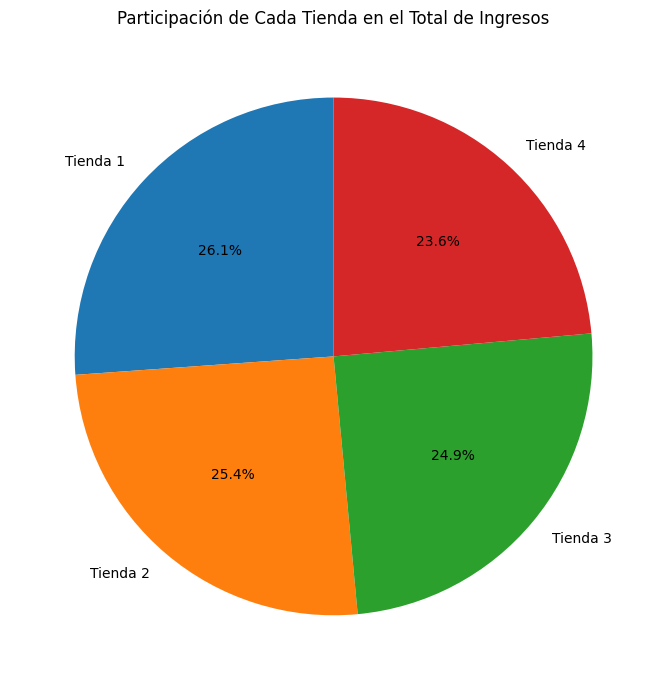

In [ ]:
import matplotlib.pyplot as plt

df_total['Precio'] = df_total['Precio'].astype(float)

# Asegurar tipo correcto
df_total['Precio'] = df_total['Precio'].astype(float)

# El ingreso de cada venta es simplemente el precio
df_total['Ingreso'] = df_total['Precio']

# Agrupar datos
ingresos_totales = df_total.groupby('Tienda')['Ingreso'].sum()
ingreso_promedio = df_total.groupby('Tienda')['Ingreso'].mean()
distribucion_ingresos = ingresos_totales

# üé® Graficar 3 gr√°ficos verdaderamente diferentes

# 1. Barra vertical: Total de ingresos
plt.figure(figsize=(8,5))
ingresos_totales.plot(kind='bar')
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Total Ingresos (USD)')
plt.xlabel('Tienda')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 2. L√≠nea: Promedio de ingreso por venta
plt.figure(figsize=(8,5))
ingreso_promedio.plot(kind='line', marker='o', linestyle='--', color='orange')
plt.title('Ingreso Promedio por Venta por Tienda')
plt.ylabel('Ingreso Promedio (USD)')
plt.xlabel('Tienda')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Torta/Pie: Distribuci√≥n del total
plt.figure(figsize=(7,7))
distribucion_ingresos.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Participaci√≥n de Cada Tienda en el Total de Ingresos')
plt.ylabel('')
plt.tight_layout()
plt.show()

# **6.- Revisi√≥n de archivos**

In [ ]:
df_total.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon    Tienda  \
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  Tienda 1   
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  Tienda 1   
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  Tienda 1   
3               Nequi                   1   3.43722 -76.52250  Tienda 1   
4               Nequi                   1   6.25184 -75.56359  Tienda 1   

    Ingreso  
0  164300.0  
1  192300.0  
2  209600.0  
3  757500.0  
4  335200.0

In [ ]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categor√≠a del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de env√≠o          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificaci√≥n            9435 non-null   int64  
 8   M√©todo de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Tienda                  9435 non-null   object 
 13  Ingreso                 9435 non-null   float64
dtypes: float64(5), int64(2), object(7)
m

In [ ]:
df_total.describe()

Precio  Costo de env√≠o  Calificaci√≥n  Cantidad de cuotas  \
count  9.435000e+03     9435.000000   9435.000000         9435.000000   
mean   4.667323e+05    24875.145734      4.014520            2.927398   
std    5.903207e+05    31480.036346      1.390518            2.802776   
min    7.600000e+03        0.000000      1.000000            1.000000   
25%    5.520000e+04     3000.000000      3.000000            1.000000   
50%    2.215000e+05    11700.000000      5.000000            1.000000   
75%    6.633000e+05    34900.000000      5.000000            4.000000   
max    2.977000e+06   162500.000000      5.000000           24.000000   

               lat          lon       Ingreso  
count  9435.000000  9435.000000  9.435000e+03  
mean      5.428909   -74.760108  4.667323e+05  
std       2.355663     1.207155  5.903207e+05  
min      -4.215280   -77.281110  7.600000e+03  
25%       4.609710   -75.563590  5.520000e+04  
50%       4.609710   -74.199040  2.215000e+05  
75%       6.251840   -74.081750  6.633000e+05  
max      11.544440   -67.923900  2.977000e+06

In [ ]:
df_total.columns

Index(['Producto', 'Categor√≠a del Producto', 'Precio', 'Costo de env√≠o',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificaci√≥n',
       'M√©todo de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda',
       'Ingreso'],
      dtype='object')

# **7.- C√°lcular ventas (ingresos) por tienda**

In [ ]:
# Calcular ingresos por tienda
ingresos_por_tienda = df_total.groupby('Tienda')['Ingreso'].sum().sort_values(ascending=False)
print(ingresos_por_tienda.apply(lambda x: f"${x:,.2f}"))

Tienda
Tienda 1    $1,150,880,400.00
Tienda 2    $1,116,343,500.00
Tienda 3    $1,098,019,600.00
Tienda 4    $1,038,375,700.00
Name: Ingreso, dtype: object


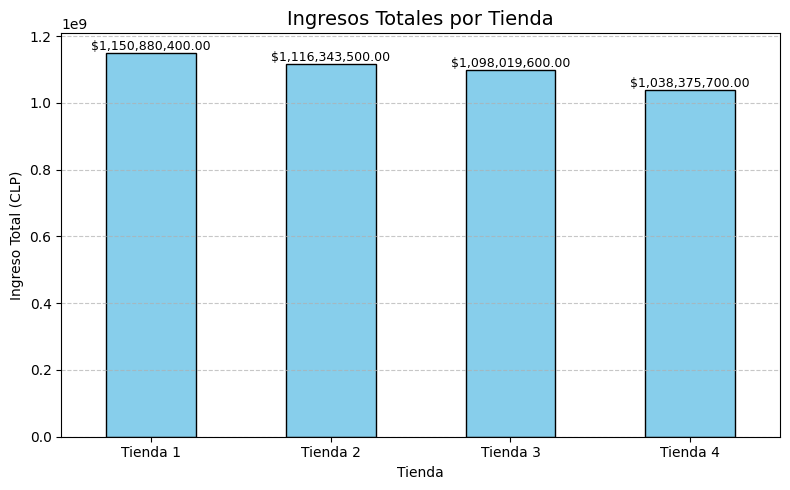

In [ ]:
# Graficar los ingresos por tienda
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
bars = ingresos_por_tienda.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Ingresos Totales por Tienda', fontsize=14)
plt.xlabel('Tienda')
plt.ylabel('Ingreso Total (CLP)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de valor sobre cada barra
for index, value in enumerate(ingresos_por_tienda):
    plt.text(index, value, f"${value:,.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

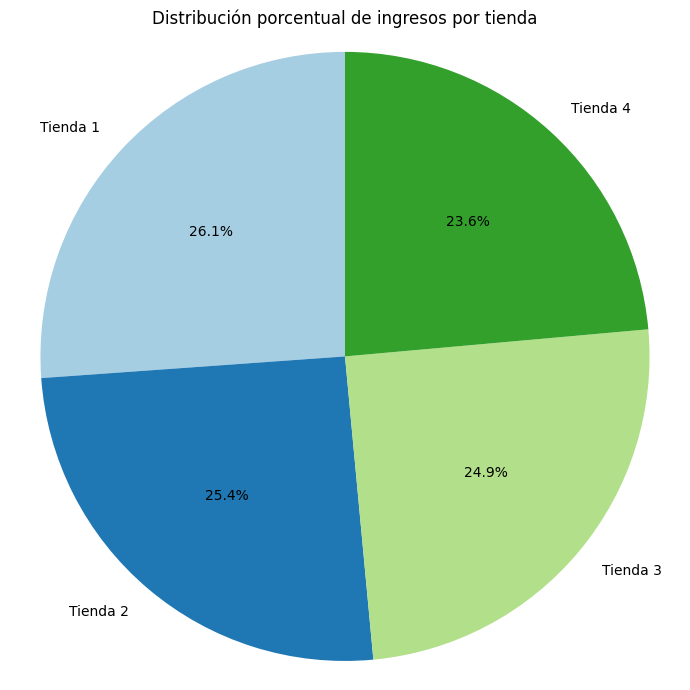

In [ ]:
# graficar la distribuci√≥n porcentual de ingresos por tienda
plt.figure(figsize=(7, 7))
plt.pie(
    ingresos_por_tienda,
    labels=ingresos_por_tienda.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)

plt.title('Distribuci√≥n porcentual de ingresos por tienda')
plt.axis('equal')  # Para que el c√≠rculo sea perfecto
plt.tight_layout()
plt.show()

# **8.- Agrupar ingresos por categor√≠a**

In [ ]:
# Agrupar ingresos por categor√≠as
ingresos_por_categoria = df_total.groupby('Categor√≠a del Producto')['Ingreso'].sum().sort_values(ascending=True)
print(ingresos_por_categoria.apply(lambda x: f"${x:,.2f}"))

Categor√≠a del Producto
Libros                        $37,696,100.00
Art√≠culos para el hogar       $57,579,800.00
Juguetes                      $73,604,400.00
Deportes y diversi√≥n         $142,977,700.00
Instrumentos musicales       $348,772,600.00
Muebles                      $757,661,000.00
Electrodom√©sticos          $1,324,751,100.00
Electr√≥nicos               $1,660,576,500.00
Name: Ingreso, dtype: object


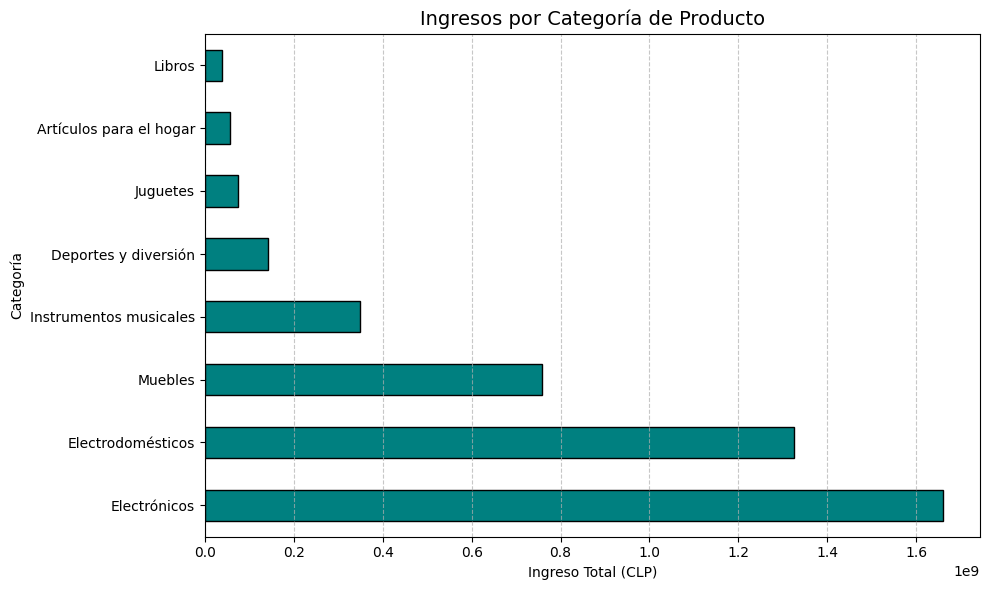

In [ ]:
# Generar gr√°ficos de los ingresos por categor√≠a
plt.figure(figsize=(10, 6))
ingresos_por_categoria.plot(kind='barh', color='teal', edgecolor='black')

plt.title('Ingresos por Categor√≠a de Producto', fontsize=14)
plt.xlabel('Ingreso Total (CLP)')
plt.ylabel('Categor√≠a')
plt.gca().invert_yaxis()  # Muestra las categor√≠as m√°s altas abajo
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()